In [9]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Testing adaline for simple liniar sepration

given a value from R^2, (x, y), is y > 1

In [118]:
train_data = np.random.uniform(-100, 100, (1000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,31.6375,37.2389,True
1,61.4876,46.4327,True
2,88.3935,-34.6047,False
3,98.3287,-55.6993,False
4,42.8192,-43.2274,False
...,...,...,...
995,-6.51538,-5.85599,False
996,-43.0856,-13.5684,False
997,-17.5811,91.2022,True
998,46.3166,20.3771,True


In [119]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([ 1.97027062, 39.45707058])

In [120]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.984

In [121]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.985

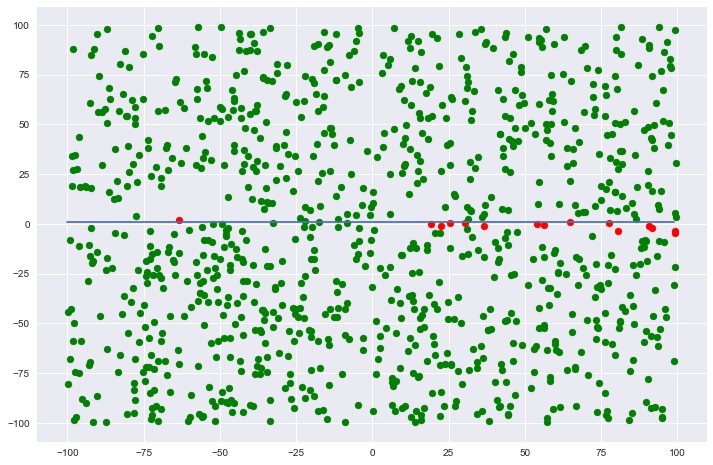

In [122]:
mistakes = test_data[np.where((test_label == pred) == False)]
success = test_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [135]:
# it declassfied only really tough ones


In [124]:
#does more data help?

train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before
train_label = train_data[:,1] > 1

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.992

In [70]:
#seems like it

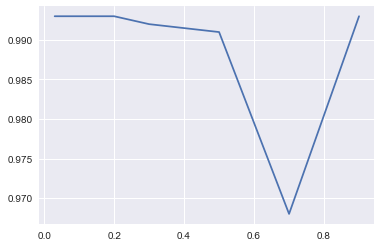

In [128]:
#what about different learning rates

scores = []

rates = [0.03, 0.07, 0.11, 0.2, 0.3, 0.5, 0.7, 0.9]

for rate in rates:

    neuron = adaline(2, rate)

    history = neuron.train(train_data, train_label)

    pred = np.array([neuron.predict(i) for i in test_data])
    pred = pred >= 0.5

    scores.append(metrics.accuracy_score(test_label, pred))


plt.plot(rates, scores)
plt.show()

In [33]:
#looks like low learning rates are a more reliable choice

## Testing adaline for a more challenging task

given a value from R^2, (x, y).
does it setesfy: 81 <= x^2 + y^2 <= 900 ?

this equation describe a ring with raduises 9 and 30

In [129]:
train_data = np.random.uniform(-100, 100, (1000, 2))

circle_small = 81 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 900

train_label = circle_small & circle_big

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,53.882,95.1376,False
1,42.3479,23.9182,False
2,-59.9012,36.2741,False
3,-20.6525,34.433,False
4,73.7382,-46.7148,False
...,...,...,...
995,-78.6451,19.8275,False
996,78.9623,20.4481,False
997,-89.1199,10.6983,False
998,31.0681,-93.3913,False


In [130]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-16.9878706 ,   5.63249429])

In [131]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.509

In [132]:
# preforms poorly but is to be excpected since
# 1-neuron model can only learn linarly seprable
# classification problomes
# in fact its predictions are in part with simply geussing (around 0.5 coorect predictions)


In [134]:
train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before

circle_small = 81 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 900

train_label = circle_small & circle_big

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(j) for j in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.484

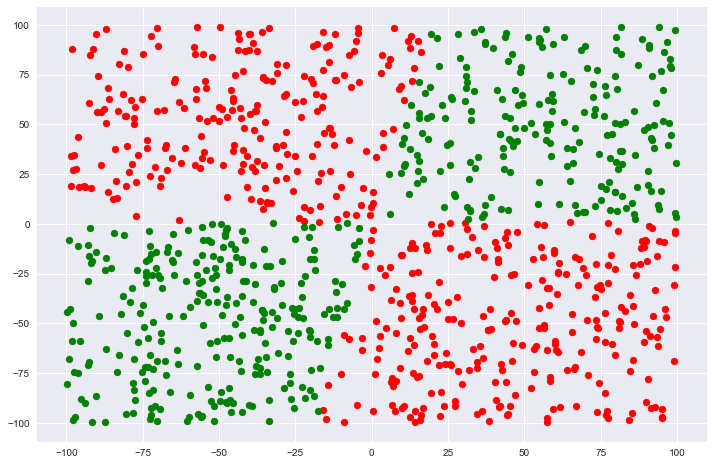

In [137]:
mistakes = test_data[np.where((test_label == pred) == False)]
success = test_data[np.where((test_label == pred) == True)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.show()

In [138]:
# we can see very clearly that the adaline tried to find A LINIAR inequalty
# to classefy the instances by which